## SUMMARY

* Several time related features were added
* AutoML was used to select models, the current best model is GBM model with a r^2 of 0.7


[Figure 1. Monthly Total Estimates from Each State](#tag1)

[Figure 2. Evolving ILI intensity throughout the Winter season of 2017/8](#tag2)


## ILI daily estimates forecast -- EDA

In [276]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime

from datetime import datetime
import time

import sys
sys.executable

import h2o
from h2o.automl import H2OAutoML

from sklearn.metrics import r2_score, mean_squared_error

In [277]:
mydata = pd.read_csv('state_traces.csv', index_col=[0])
mydata.head()

,state,date,value
107,NJ,20151002,4293.414810
108,NJ,20151003,5977.121664
109,NJ,20151004,1903.517673
110,NJ,20151005,20754.601160
111,NJ,20151006,12885.652476


### Add several time features

In [278]:
mydata['month'] = [str(i)[4:6] for i in mydata.date]
mydata['datestr'] = [(str(i)[:4]+'-' + str(i)[4:6] + '-' + str(i)[6:]) for i in mydata.date]
mydata['dateobj'] = [datetime.strptime(i, "%Y-%m-%d") for i in mydata.datestr]
mydata['timestamp'] = [time.mktime(i.timetuple()) for i in mydata.dateobj]

In [279]:
mydata['DOY'] = [time.strftime('%j', time.gmtime(i)) for i in mydata.timestamp]
mydata['DOM'] = [time.strftime('%d', time.gmtime(i)) for i in mydata.timestamp]
mydata['DOW'] = [time.strftime('%w', time.gmtime(i)) for i in mydata.timestamp]
mydata['Week'] = [time.strftime('%U', time.gmtime(i)) for i in mydata.timestamp]
mydata['year'] = [str(i)[:4] for i in mydata.datestr]

In [280]:
mydata.head()

,state,date,value,month,datestr,dateobj,timestamp,DOY,DOM,DOW,Week,year
107,NJ,20151002,4293.414810,10,2015-10-02,2015-10-02,1.443766e+09,275,02,5,39,2015
108,NJ,20151003,5977.121664,10,2015-10-03,2015-10-03,1.443852e+09,276,03,6,39,2015
109,NJ,20151004,1903.517673,10,2015-10-04,2015-10-04,1.443938e+09,277,04,0,40,2015
110,NJ,20151005,20754.601160,10,2015-10-05,2015-10-05,1.444025e+09,278,05,1,40,2015
111,NJ,20151006,12885.652476,10,2015-10-06,2015-10-06,1.444111e+09,279,06,2,40,2015


In [281]:
mydata.state.unique()

array(['NJ', 'NY', 'PA'], dtype=object)

In [282]:
cm = plt.get_cmap('viridis')

In [283]:
[cm(1/float(i)) for i in range(9, 3, -1)]

[(0.281412, 0.155834, 0.469201, 1.0),
 (0.278826, 0.17549, 0.483397, 1.0),
 (0.275191, 0.194905, 0.496005, 1.0),
 (0.267968, 0.223549, 0.512008, 1.0),
 (0.253935, 0.265254, 0.529983, 1.0),
 (0.229739, 0.322361, 0.545706, 1.0)]

In [284]:
plt.rc('axes', prop_cycle=(cycler('color', [cm(1/float(i)) for i in range(1,5)]) ))

### Visualize the daily estimates of each states

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


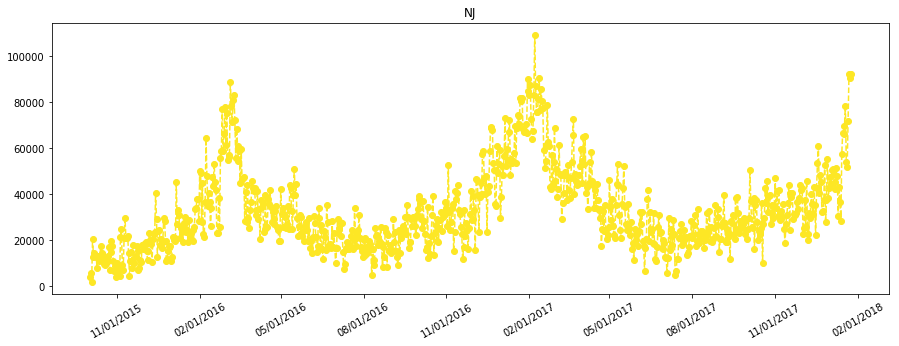

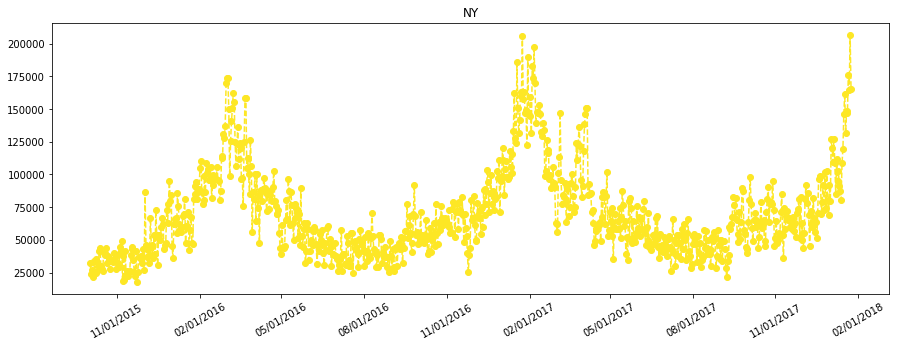

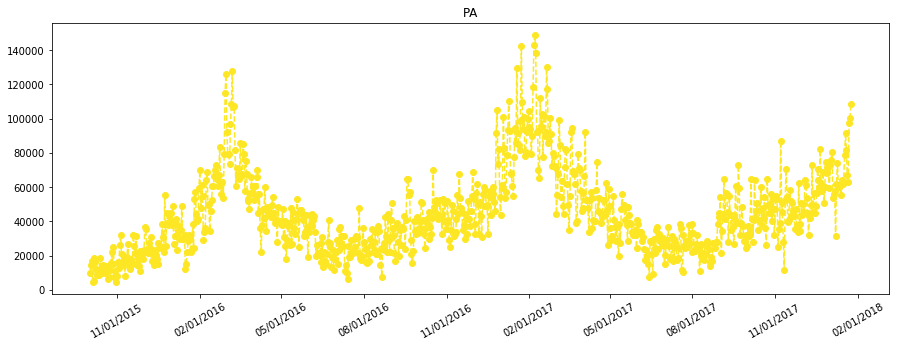

In [285]:
plt.rcParams['figure.figsize'] = (15, 5)
formatter = DateFormatter('%m/%d/%Y')

for state in mydata.state.unique():
    mysub = mydata[mydata.state == state]
    mysub['datestr'] = [str(i) for i in mysub.date]
    mysub['num'] = mdates.datestr2num(mysub.datestr)
    fig, ax = plt.subplots()
    plt.plot_date(mysub.num, mysub.value, ls = '--')
    #ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_tick_params(rotation=30, labelsize=10)

    plt.title(state)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


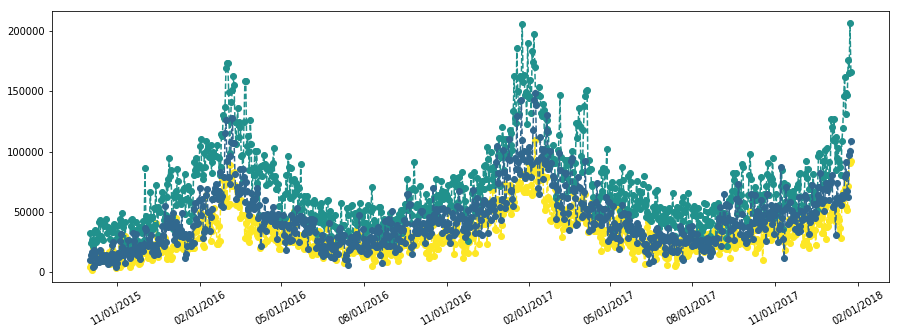

In [286]:
plt.rcParams['figure.figsize'] = (15, 5)
formatter = DateFormatter('%m/%d/%Y')
fig, ax = plt.subplots()

for state in mydata.state.unique():
    mysub = mydata[mydata.state == state]
    mysub['datestr'] = [str(i) for i in mysub.date]
    mysub['num'] = mdates.datestr2num(mysub.datestr)
    plt.plot_date(mysub.num, mysub.value, ls = '--')
    #ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_tick_params(rotation=30, labelsize=10)

    #plt.title(state)

### Monthly total estimates for each states

Some observations:

* The dynamics of ILI cases between PA and NJ changed around non-flu seasons: the number in NJ almost became the same as in PA at August 2017 and October 2015

* The trends from three states tend to be similar; NY has the largest population and highest population density, population movement. NY may drive the ILI cases in other two states if there is an influx of cases from/to NY

<a id='tag1'></a>
 
 #### Figure 1

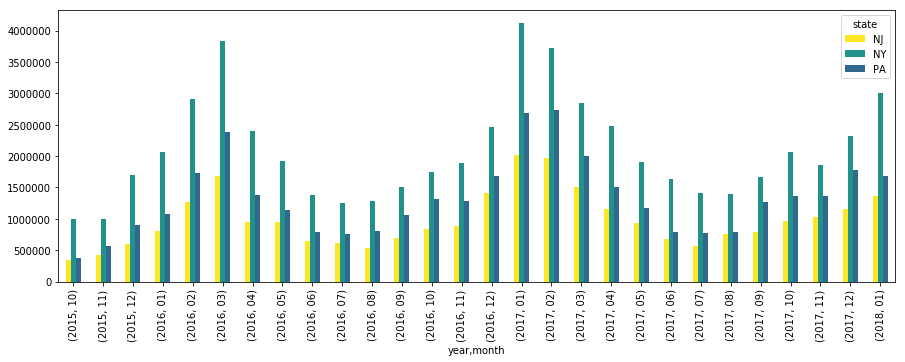

In [287]:
mydata.groupby(['year', 'month', 'state'])['value'].sum().unstack().plot.bar(width = 0.5)


In [288]:
mydata.head(4)

,state,date,value,month,datestr,dateobj,timestamp,DOY,DOM,DOW,Week,year
107,NJ,20151002,4293.414810,10,2015-10-02,2015-10-02,1.443766e+09,275,02,5,39,2015
108,NJ,20151003,5977.121664,10,2015-10-03,2015-10-03,1.443852e+09,276,03,6,39,2015
109,NJ,20151004,1903.517673,10,2015-10-04,2015-10-04,1.443938e+09,277,04,0,40,2015
110,NJ,20151005,20754.601160,10,2015-10-05,2015-10-05,1.444025e+09,278,05,1,40,2015


## Initial model

In [289]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 1 hour 47 mins
H2O cluster timezone:,America/Denver
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.5
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_xiguo_bjroes
H2O cluster total nodes:,1
H2O cluster free memory:,636 Mb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [290]:
time_list = dict()

for state in mydata.state.unique():
    mymin = mydata[mydata.state == state]['timestamp'].min()
    mymax = mydata[mydata.state == state]['timestamp'].max()
    mysp1 = mymin + (mymax-mymin)*.7
    mysp2 = mymin + (mymax - mymin)*.8
    print(state, " : ", mymin, mymax)
    time_list.update({state: [mysp1, mysp2, mymax]})

time_list

NJ  :  1443765600.0 1516777200.0
NY  :  1443765600.0 1516777200.0
PA  :  1443765600.0 1516777200.0


{'NJ': [1494873720.0, 1502174880.0, 1516777200.0],
 'NY': [1494873720.0, 1502174880.0, 1516777200.0],
 'PA': [1494873720.0, 1502174880.0, 1516777200.0]}

In [291]:
mytrain = pd.DataFrame()
mycv = pd.DataFrame()
mytest = pd.DataFrame()


for state in mydata.state.unique():
    train = mydata[(mydata.state == state)& (mydata.timestamp < time_list[state][0] )]
    mytrain = mytrain.append(pd.DataFrame(data = train), ignore_index = True)
    
    cv = mydata[(mydata.state == state) & (mydata.timestamp >= time_list[state][0]) & (mydata.timestamp < time_list[state][1])]
    mycv = mycv.append(pd.DataFrame(data = cv), ignore_index = True)
    
    test = mydata[(mydata.state == state) & (mydata.timestamp >= time_list[state][1])]
    mytest = mytest.append(pd.DataFrame(data = test), ignore_index = True)

In [292]:
mytrain.shape, mycv.shape, mytest.shape

((1776, 12), (255, 12), (507, 12))

In [293]:
mytrainhdf = h2o.H2OFrame(mytrain)
mycvhdf = h2o.H2OFrame(mycv)
mytesthdf = h2o.H2OFrame(mytest)

/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [294]:
mytrainhdf.summary()

,state,date,value,month,datestr,dateobj,timestamp,DOY,DOM,DOW,Week,year
type,enum,int,real,int,time,time,int,int,int,int,int,int
mins,,20151002.0,1903.5176731388888,1.0,1443744000000.0,1443744000000.0,1443765600.0,1.0,1.0,0.0,0.0,2015.0
mean,,20161394.09797299,50153.29430763017,6.353040540540534,1469275200000.0005,1469275200000.0005,1469298374.999999,178.14358108108098,15.550675675675688,2.9999999999999987,25.63513513513515,2016.0743243243285
maxs,,20170515.0,206139.82939757747,12.0,1494806400000.0,1494806400000.0,1494828000.0,366.0,31.0,6.0,52.0,2017.0
sigma,,5892.063393178443,31881.13190973166,3.7601051514425543,14769524331.151329,14769524331.151329,14769342.679048136,115.05972089684015,8.78421885836503,2.004783013090809,16.347900197980664,0.6135508239967679
zeros,,0,0,0,0,0,0,0,0,255,6,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,NJ,20151002.0,4293.4148101629635,10.0,2015-10-02 00:00:00,2015-10-02 00:00:00,1443765600.0,275.0,2.0,5.0,39.0,2015.0
1,NJ,20151003.0,5977.121664361111,10.0,2015-10-03 00:00:00,2015-10-03 00:00:00,1443852000.0,276.0,3.0,6.0,39.0,2015.0
2,NJ,20151004.0,1903.5176731388888,10.0,2015-10-04 00:00:00,2015-10-04 00:00:00,1443938400.0,277.0,4.0,0.0,40.0,2015.0


In [295]:
x = mytrainhdf.columns
y = "value"
x.remove(y)

aml = H2OAutoML(max_runtime_secs = 30)
aml.train(x = x, y = y,
          training_frame = mytrainhdf, validation_frame = mycvhdf, leaderboard_frame = mycvhdf)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DeepLearning_0_AutoML_20180812_103428,1.6129e+08,12700,1.6129e+08,10464.1,0.451344
GBM_grid_0_AutoML_20180812_103428_model_2,2.16162e+08,14702.4,2.16162e+08,12099.5,0.490275
GBM_grid_0_AutoML_20180812_103428_model_3,2.37448e+08,15409.4,2.37448e+08,12740.6,0.497119
GBM_grid_0_AutoML_20180812_103428_model_4,2.45713e+08,15675.2,2.45713e+08,13427.7,0.521669
GBM_grid_0_AutoML_20180812_103428_model_6,2.54904e+08,15965.7,2.54904e+08,12719,0.482143
GBM_grid_0_AutoML_20180812_103428_model_1,2.60653e+08,16144.7,2.60653e+08,13562.5,0.511773
DRF_0_AutoML_20180812_103428,2.71307e+08,16471.4,2.71307e+08,14081.6,0.55228
GBM_grid_0_AutoML_20180812_103428_model_5,3.04743e+08,17456.9,3.04743e+08,15491.7,0.599538
GBM_grid_0_AutoML_20180812_103428_model_0,3.6625e+08,19137.7,3.6625e+08,16287.5,0.574293
XRT_0_AutoML_20180812_103428,4.57123e+08,21380.4,4.57123e+08,19277.3,0.674535


In [296]:
mypred = aml.leader.predict(mytesthdf)
mypredpd = mypred.as_data_frame()

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [297]:
mypredpd.head()

,predict
0,26625.953179
1,25003.974293
2,25204.093351
3,27170.269530
4,30696.082858


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


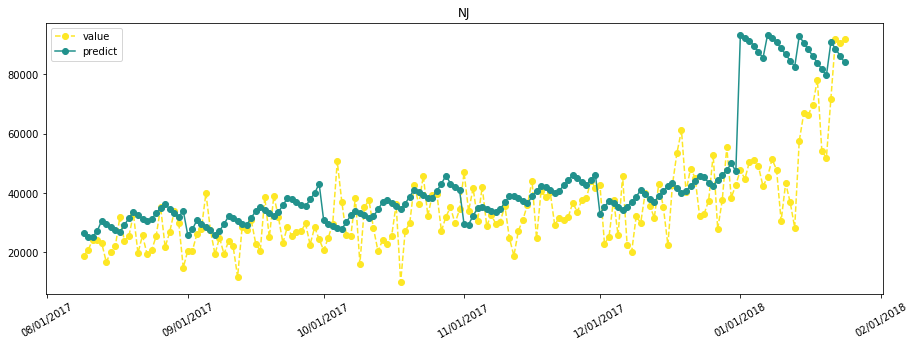

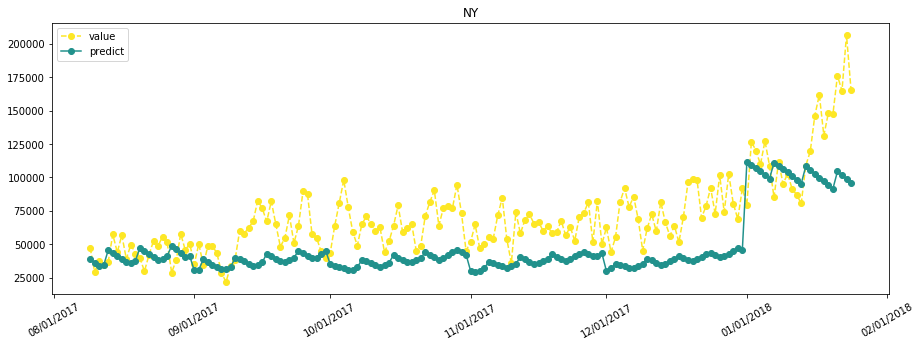

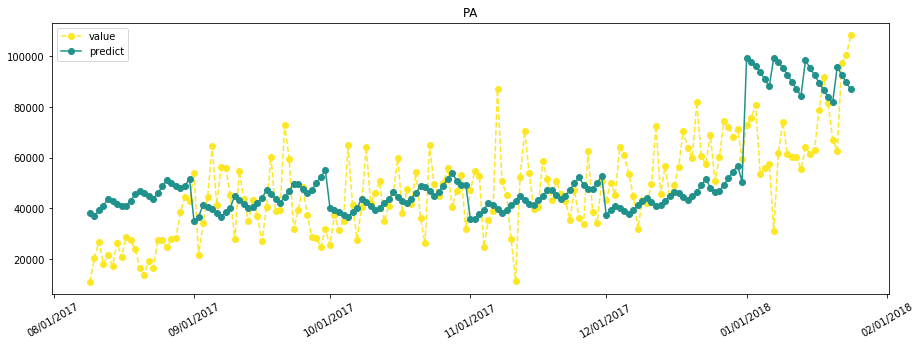

In [298]:
mypredpd = mypredpd.reset_index()

mymerge = pd.concat([mytest, mypredpd], axis = 1)

plt.rcParams['figure.figsize'] = (15, 5)
formatter = DateFormatter('%m/%d/%Y')

for state in mymerge.state.unique():
    mysub = mymerge[mymerge.state == state]
    mysub['datestr'] = [str(i) for i in mysub.date]
    mysub['num'] = mdates.datestr2num(mysub.datestr)
    fig, ax = plt.subplots()
    plt.plot_date(mysub.num, mysub.value, ls = '--')
    plt.plot_date(mysub.num, mysub.predict, ls = '-')
    #ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_tick_params(rotation=30, labelsize=10)
    plt.legend()
    plt.title(state)

In [299]:
r2_score(mymerge.value, mymerge.predict)

0.244164464563296

In [300]:
aml.leader

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_0_AutoML_20180812_103428


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 305934290.0996806
RMSE: 17490.977391206034
MAE: 12678.317473101824
RMSLE: 0.38495131137304894
Mean Residual Deviance: 305934290.0996806

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 161289616.5505649
RMSE: 12699.984903556575
MAE: 10464.11227925074
RMSLE: 0.45134438393135773
Mean Residual Deviance: 161289616.5505649

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 330198263.34171635
RMSE: 18171.358324069126
MAE: 12991.352306738137
RMSLE: 0.3807069866551233
Mean Residual Deviance: 330198263.34171635
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,12991.498,512.31903,12732.864,12166.665,14315.16,13091.101,12651.699
mean_residual_deviance,330204128.0000000,25547770.0000000,319778784.0000000,297960928.0000000,399747328.0000000,326285088.0000000,307248512.0000000
mse,330204128.0000000,25547770.0000000,319778784.0000000,297960928.0000000,399747328.0000000,326285088.0000000,307248512.0000000
r2,0.6729469,0.0357310,0.687973,0.7137196,0.5738633,0.6866999,0.7024789
residual_deviance,330204128.0000000,25547770.0000000,319778784.0000000,297960928.0000000,399747328.0000000,326285088.0000000,307248512.0000000
rmse,18145.89,682.1894,17882.36,17261.545,19993.682,18063.363,17528.506
rmsle,0.3799891,0.0166143,0.3664583,0.3468234,0.4166794,0.3913589,0.3786256


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
,2018-08-12 10:34:52,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2018-08-12 10:34:52,0.368 sec,227125 obs/sec,1.0230856,1,1817.0,26448.4654851,699521326.5160283,21533.0744263,0.3113824,29364.6717346,862283946.0837245,26866.8310810,-2.3267378
,2018-08-12 10:34:52,0.424 sec,337550 obs/sec,11.4037162,11,20253.0,17490.9773912,305934290.0996806,12678.3174731,0.6988344,12699.9849036,161289616.5505649,10464.1122793,0.3777360


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
DOY,1.0,1.0,0.1081430
state.PA,0.9576041,0.9576041,0.1035582
dateobj,0.9003814,0.9003814,0.0973699
state.NY,0.8603728,0.8603728,0.0930433
month,0.8039086,0.8039086,0.0869371
date,0.6974974,0.6974974,0.0754295
DOM,0.6431217,0.6431217,0.0695491
timestamp,0.5950293,0.5950293,0.0643482
Week,0.5943264,0.5943264,0.0642722
year,0.5933013,0.5933013,0.0641614


In [301]:
!ls

1-EDA.ipynb
3-feature-eng.ipynb
4-feature-egn.ipynb
GBM_grid_0_AutoML_20180811_114056_model_1
GBM_grid_0_AutoML_20180811_153452_model_4
GBM_grid_0_AutoML_20180811_180606_model_4
Keras_LSTM_Twitter.ipynb
Sentiment_Analysis_Dataset.csv
State_to_State_Migrations_Table_2016.xls
Take home exam.pdf
state_traces.csv
tweet_model.pkl
vocab.txt


In [302]:
model_path = h2o.save_model(model=aml.leader, path="", force=True)

### Use a larger training set

In [303]:
time_list = dict()

for state in mydata.state.unique():
    mymin = mydata[mydata.state == state]['timestamp'].min()
    mymax = mydata[mydata.state == state]['timestamp'].max()
    mysp1 = mymin + (mymax-mymin)*.8
    mysp2 = mymin + (mymax - mymin)*.9
    print(state, " : ", mymin, mymax)
    time_list.update({state: [mysp1, mysp2, mymax]})

time_list

NJ  :  1443765600.0 1516777200.0
NY  :  1443765600.0 1516777200.0
PA  :  1443765600.0 1516777200.0


{'NJ': [1502174880.0, 1509476040.0, 1516777200.0],
 'NY': [1502174880.0, 1509476040.0, 1516777200.0],
 'PA': [1502174880.0, 1509476040.0, 1516777200.0]}

In [304]:
mytrain = pd.DataFrame()
mycv = pd.DataFrame()
mytest = pd.DataFrame()


for state in mydata.state.unique():
    train = mydata[(mydata.state == state)& (mydata.timestamp < time_list[state][0] )]
    mytrain = mytrain.append(pd.DataFrame(data = train), ignore_index = True)
    
    cv = mydata[(mydata.state == state) & (mydata.timestamp >= time_list[state][0]) & (mydata.timestamp < time_list[state][1])]
    mycv = mycv.append(pd.DataFrame(data = cv), ignore_index = True)
    
    test = mydata[(mydata.state == state) & (mydata.timestamp >= time_list[state][1])]
    mytest = mytest.append(pd.DataFrame(data = test), ignore_index = True)

In [305]:
mytrainhdf = h2o.H2OFrame(mytrain)
mycvhdf = h2o.H2OFrame(mycv)
mytesthdf = h2o.H2OFrame(mytest)

/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [306]:
x = mytrainhdf.columns
y = "value"
x.remove(y)

aml = H2OAutoML(max_runtime_secs = 30)
aml.train(x = x, y = y,
          training_frame = mytrainhdf, validation_frame = mycvhdf, leaderboard_frame = mycvhdf)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_0_AutoML_20180812_103506_model_1,1.49056e+08,12208.9,1.49056e+08,9121.28,0.297022
GBM_grid_0_AutoML_20180812_103506_model_3,1.51163e+08,12294.8,1.51163e+08,9065.45,0.292768
GBM_grid_0_AutoML_20180812_103506_model_0,1.56439e+08,12507.6,1.56439e+08,9001.18,0.29906
GBM_grid_0_AutoML_20180812_103506_model_2,1.60719e+08,12677.5,1.60719e+08,9610.49,0.309207
GBM_grid_0_AutoML_20180812_103506_model_4,1.67246e+08,12932.4,1.67246e+08,9698.59,0.319089
GBM_grid_0_AutoML_20180812_103506_model_5,1.71848e+08,13109.1,1.71848e+08,9700.52,0.309517
DRF_0_AutoML_20180812_103506,1.78336e+08,13354.3,1.78336e+08,9664.77,0.313655
GBM_grid_0_AutoML_20180812_103506_model_6,1.8136e+08,13467,1.8136e+08,9885.31,0.312498
XRT_0_AutoML_20180812_103506,2.28136e+08,15104.2,2.28136e+08,11007.3,0.351812
StackedEnsemble_AllModels_0_AutoML_20180812_103506,3.76523e+08,19404.2,3.76523e+08,16588.7,0.514879


In [307]:
mypred = aml.leader.predict(mytesthdf)
mypredpd = mypred.as_data_frame()
mypredpd = mypredpd.reset_index()
mymerge = pd.concat([mytest, mypredpd], axis = 1)

gbm prediction progress: |████████████████████████████████████████████████| 100%


<a id='tag2'></a>

#### Figure 2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


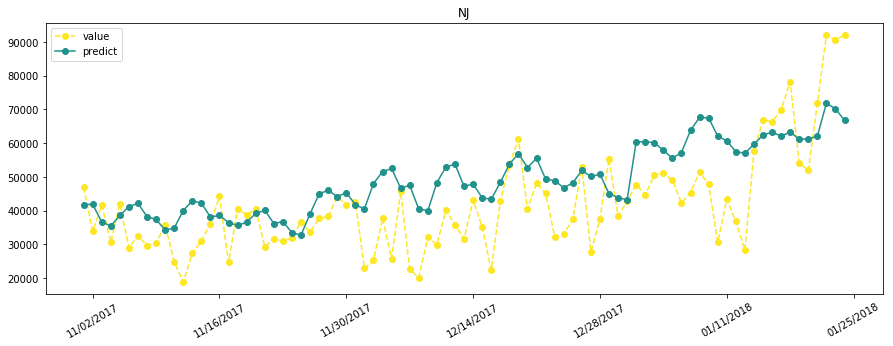

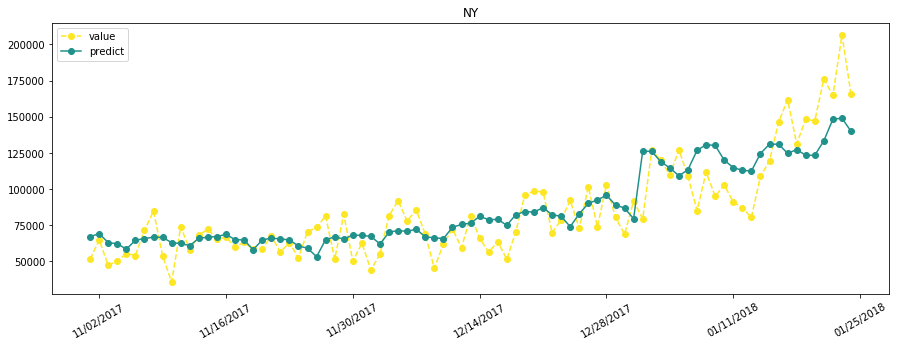

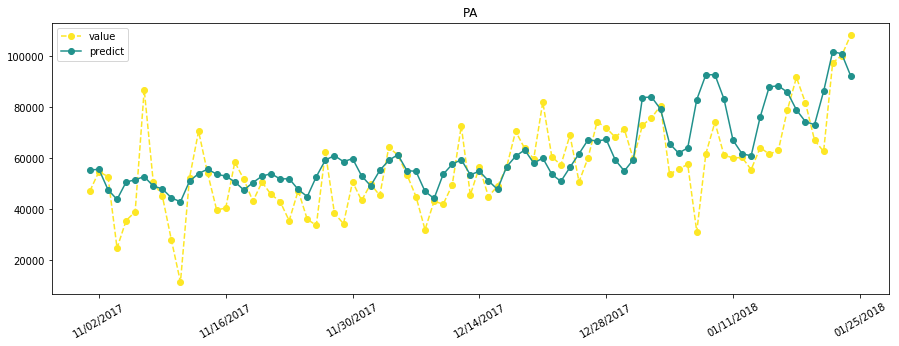

In [308]:
plt.rcParams['figure.figsize'] = (15, 5)
formatter = DateFormatter('%m/%d/%Y')

for state in mymerge.state.unique():
    mysub = mymerge[mymerge.state == state]
    mysub['datestr'] = [str(i) for i in mysub.date]
    mysub['num'] = mdates.datestr2num(mysub.datestr)
    fig, ax = plt.subplots()
    plt.plot_date(mysub.num, mysub.value, ls = '--')
    plt.plot_date(mysub.num, mysub.predict, ls = '-')
    #ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_tick_params(rotation=30, labelsize=10)
    plt.legend()
    plt.title(state)

In [309]:
r2_score(mymerge.value, mymerge.predict)

0.7344963199002927

In [310]:
mean_squared_error(mymerge.value, mymerge.predict)

228820756.07026732

In [312]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_0_AutoML_20180812_103506_model_1


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 58936152.5104305
RMSE: 7676.988505294931
MAE: 5857.575122286686
RMSLE: 0.216102545371832
Mean Residual Deviance: 58936152.5104305

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 149056074.61140168
RMSE: 12208.852305249731
MAE: 9121.280680267535
RMSLE: 0.29702158290616093
Mean Residual Deviance: 149056074.61140168

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 113839835.90405914
RMSE: 10669.575244781732
MAE: 8081.211863961347
RMSLE: 0.27711258685126766
Mean Residual Deviance: 113839835.90405914
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,8081.3516,242.09021,7797.918,8115.3086,8730.756,7843.3604,7919.414
mean_residual_deviance,113844824.0000000,6862060.5,103710752.0000000,108800856.0000000,132121872.0000000,113689088.0000000,110901560.0000000
mse,113844824.0000000,6862060.5,103710752.0000000,108800856.0000000,132121872.0000000,113689088.0000000,110901560.0000000
r2,0.8795564,0.0105845,0.8918649,0.8880618,0.8503008,0.8822029,0.8853513
residual_deviance,113844824.0000000,6862060.5,103710752.0000000,108800856.0000000,132121872.0000000,113689088.0000000,110901560.0000000
rmse,10660.506,314.99063,10183.848,10430.765,11494.428,10662.509,10530.981
rmsle,0.2770624,0.0037838,0.2741054,0.27594,0.2874739,0.2754325,0.2723602


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-08-12 10:35:16,1.721 sec,0.0,30812.4538516,23289.7824870,949407312.3581415,19404.4982106,16588.9770907,376534550.8063137
,2018-08-12 10:35:16,1.735 sec,5.0,20321.7478676,15294.6822352,412973436.3959807,15528.7707025,13083.7502437,241142719.5295021
,2018-08-12 10:35:16,1.748 sec,10.0,15553.1272115,11690.2037561,241899766.0585728,14161.5250504,11430.0188529,200548791.7538515
,2018-08-12 10:35:16,1.759 sec,15.0,12582.1429019,9432.8507310,158310320.0045114,13363.4147194,10422.1145173,178580852.9617619
,2018-08-12 10:35:16,1.771 sec,20.0,10887.0967331,8146.2468542,118528875.2765822,12774.3231084,9810.0899674,163183330.8777987
,2018-08-12 10:35:16,1.783 sec,25.0,9898.4257849,7421.0770252,97978833.0187628,12456.5505913,9420.9905479,155165652.6326740
,2018-08-12 10:35:16,1.796 sec,30.0,9131.5726417,6859.0854618,83385618.9100583,12285.0086495,9220.6285220,150921437.5194913
,2018-08-12 10:35:16,1.807 sec,35.0,8703.5513232,6570.5233830,75751805.6361433,12205.2537409,9089.7613166,148968218.8796104
,2018-08-12 10:35:16,1.819 sec,40.0,8378.5847217,6336.8413654,70200681.9387234,12131.7992396,9022.9226351,147180552.7896776
,2018-08-12 10:35:16,1.830 sec,45.0,8137.1105895,6167.9358939,66212568.7455342,12194.4987116,9047.6732841,148705798.8270621


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
state,2371110567936.0000000,1.0,0.2780795
DOY,2203078885376.0000000,0.9291338,0.2583731
Week,1212835823616.0000000,0.5115054,0.1422392
month,727842816000.0000000,0.3069628,0.0853601
dateobj,626656673792.0000000,0.2642883,0.0734932
timestamp,564537131008.0000000,0.2380898,0.0662079
datestr,315334950912.0000000,0.1329904,0.0369819
DOW,196175429632.0000000,0.0827357,0.0230071
DOM,182884466688.0000000,0.0771303,0.0214484
date,120522383360.0000000,0.0508295,0.0141346
